In [1305]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [1306]:
df_real_estate_valuation = fetch_ucirepo(id=477).data.original
df_real_estate_valuation

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [1307]:
df_real_estate_valuation.rename(columns={"No":"Id","X1 transaction date":"Transaction date","X2 house age":"House age","X3 distance to the nearest MRT station":"Distance in meters to the nearest MRT station","X4 number of convenience stores":"Number of convenience stores","X5 latitude":"Latitue","X6 longitude":"Longitude","Y house price of unit area":"House price of unit area"},inplace=True)
df_real_estate_valuation

,Id,Transaction date,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [1308]:
z = '2012.9'
print(z[0:4],z[-1])

2012 9


In [1309]:
def format_date(x):
    year,month = map(int,str(round(x,1)).replace('.','/').split('/'))

    month_dict = {
        0: "January",
        1: "February",
        2: "March",
        3: "April",
        4: "May",
        5: "June",
        6: "July",
        7: "August",
        8: "September",
        9: "October",
        10: "November",
        11: "December"
    }
    year = str(year)

    month_name = month_dict.get(month, "Invalid Month")
    result = month_name+'/'+year
    return result



df_real_estate_valuation['Transaction date']=df_real_estate_valuation['Transaction date'].apply(lambda x: format_date(x))
df_real_estate_valuation['Transaction date']

0        October/2012
1        October/2012
2           July/2013
3           June/2013
4      September/2012
            ...      
409      January/2013
410       August/2012
411        March/2013
412      January/2013
413         June/2013
Name: Transaction date, Length: 414, dtype: object

In [1310]:
df_real_estate_valuation

,Id,Transaction date,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,1,October/2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,October/2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,July/2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,June/2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,September/2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,January/2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,August/2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,March/2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,January/2013,8.1,104.81010,5,24.96674,121.54067,52.5


In [1311]:
df_real_estate_valuation.isnull().sum()

Id                                               0
Transaction date                                 0
House age                                        0
Distance in meters to the nearest MRT station    0
Number of convenience stores                     0
Latitue                                          0
Longitude                                        0
House price of unit area                         0
dtype: int64

In [1312]:
df_real_estate_valuation.describe()

,Id,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [1313]:
df_real_estate_valuation.iloc[:,1:8]

,Transaction date,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,October/2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,October/2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,July/2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,June/2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,September/2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,January/2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,August/2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,March/2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,January/2013,8.1,104.81010,5,24.96674,121.54067,52.5


Text(0.5, 1.0, 'Relation between Distance to the nearest MRT station and house price of unit area ')

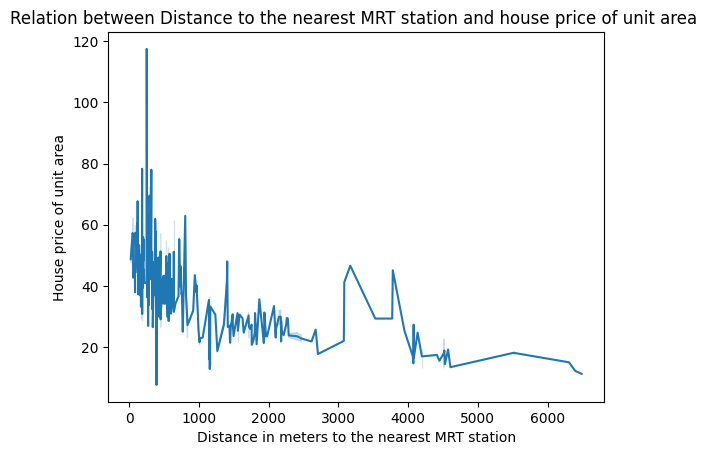

In [1314]:
sns.lineplot(data=df_real_estate_valuation.iloc[:,1:8],y=df_real_estate_valuation['House price of unit area'],x=df_real_estate_valuation['Distance in meters to the nearest MRT station'])
plt.title('Relation between Distance to the nearest MRT station and house price of unit area ')

Text(0.5, 1.0, 'Price of unit area and number of convenience stores')

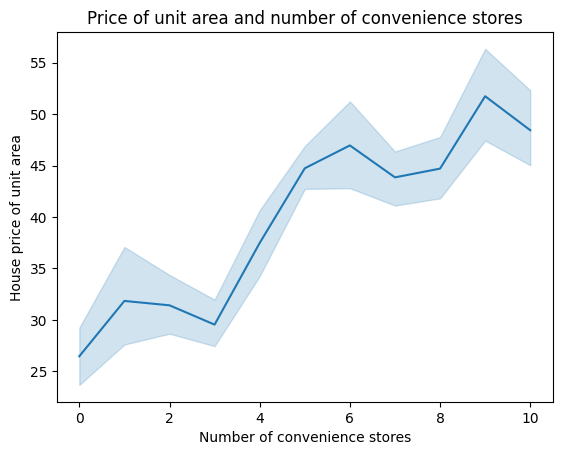

In [1315]:
sns.lineplot(data=df_real_estate_valuation.iloc[:,1:8],y='House price of unit area',x='Number of convenience stores')
plt.title('Price of unit area and number of convenience stores')

In [1316]:
#df_real_estate_valuation['House age'] = round(df_real_estate_valuation['House age'],0)

In [1317]:
df_data_without_id_and_datatransection = df_real_estate_valuation[[
       'House age',
       'Distance in meters to the nearest MRT station',
       'Number of convenience stores',
       'Latitue',
       'Longitude',
       'House price of unit area']]

In [1318]:
center_latitue = df_data_without_id_and_datatransection['Latitue'].mean()
center_longitude = df_data_without_id_and_datatransection['Longitude'].mean()
print(center_latitue,center_longitude)

24.969030072463767 121.53336108695655


In [1319]:
df_data_without_id_and_datatransection['Distance from center'] = np.sqrt((df_data_without_id_and_datatransection['Latitue']-center_latitue)**2+(df_data_without_id_and_datatransection['Longitude']-center_longitude)**2)

C:\Users\mbern\AppData\Local\Temp\ipykernel_10248\1790347157.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1320]:
df_data_without_id_and_datatransection

,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area,Distance from center
0,32.0,84.87882,10,24.98298,121.54024,37.9,0.015554
1,19.5,306.59470,9,24.98034,121.53951,42.2,0.012873
2,13.3,561.98450,5,24.98746,121.54391,47.3,0.021235
3,13.3,561.98450,5,24.98746,121.54391,54.8,0.021235
4,5.0,390.56840,5,24.97937,121.54245,43.1,0.013767
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,0.040354
410,5.6,90.45606,9,24.97433,121.54310,50.0,0.011088
411,18.8,390.96960,7,24.97923,121.53986,40.6,0.012094
412,8.1,104.81010,5,24.96674,121.54067,52.5,0.007659


In [1321]:
df_data_without_id_and_datatransection.corr()

,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area,Distance from center
House age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567,-0.025940
Distance in meters to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613,0.928831
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005,-0.473598
Latitue,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307,-0.505831
Longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287,-0.641841
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000,-0.578110
Distance from center,-0.025940,0.928831,-0.473598,-0.505831,-0.641841,-0.578110,1.000000


Text(0.5, 1.0, 'Heat map by correlation between the variables')

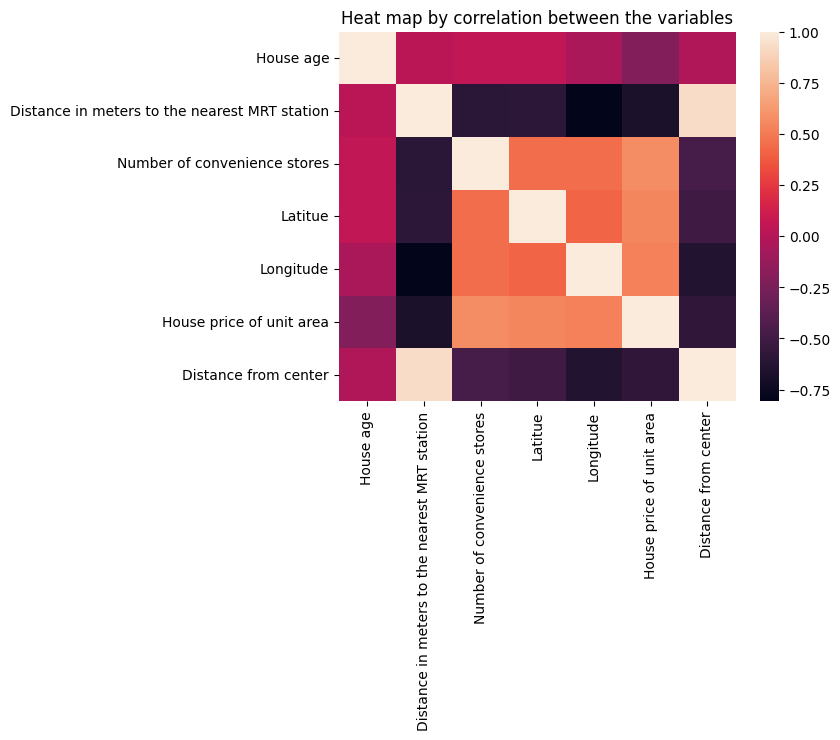

In [1322]:
sns.heatmap(df_data_without_id_and_datatransection.corr())
plt.title('Heat map by correlation between the variables')

Simple Linear LinearRegression

In [1323]:
standarScale = StandardScaler()
df_linearegression = df_data_without_id_and_datatransection.drop(columns=['Distance from center'])
x = df_linearegression.iloc[:,0:5].values
y = df_linearegression.iloc[:,5:6].values
df_linearegression


,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [1324]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1325]:
x_train.shape,x_test.shape

((331, 5), (83, 5))

In [1326]:
linear_regression = LinearRegression()
model_linear = linear_regression.fit(x_train,y_train)

In [1327]:
model_linear.coef_, model_linear.intercept_

(array([[-2.64990176e-01, -4.14590169e-03,  1.13191477e+00,
          2.39912594e+02, -1.23561949e+00]]),
 array([-5797.58821111]))

In [1328]:
predict_0 = model_linear.predict([[19.3,170,7,24.99,121.80]])
predict_0

array([[49.43334757]])

In [1329]:
predict_simple_linear_regression = model_linear.predict(x_test)
print(mean_squared_error(y_test,predict_simple_linear_regression),mean_absolute_error(y_test,predict_simple_linear_regression))


62.1722356224164 5.745927475462705


In [1330]:
y_test

array([[45.3],
       [14.4],
       [46. ],
       [15.6],
       [50.2],
       [38.1],
       [48.5],
       [41.4],
       [51.6],
       [40.1],
       [42. ],
       [42.4],
       [28.5],
       [39.1],
       [53.7],
       [36.8],
       [40.6],
       [55.2],
       [39.3],
       [44.3],
       [53.5],
       [25.3],
       [22.8],
       [51.7],
       [45.5],
       [34.4],
       [31.6],
       [25.9],
       [49.5],
       [24.7],
       [51.7],
       [29.7],
       [45.4],
       [50.5],
       [26.5],
       [30.1],
       [46.1],
       [28.9],
       [54.4],
       [15. ],
       [44.9],
       [29.8],
       [23.6],
       [48. ],
       [16.7],
       [40.9],
       [40.2],
       [12.9],
       [21.3],
       [62.1],
       [63.9],
       [40.3],
       [42.2],
       [19.1],
       [28.4],
       [28.5],
       [60.7],
       [37.5],
       [39.3],
       [28.8],
       [42.3],
       [44.3],
       [42.6],
       [57.4],
       [42.2],
       [25.7],
       [13

In [1331]:
predict_simple_linear_regression

array([[41.39074736],
       [12.35535341],
       [41.10500538],
       [12.16895621],
       [40.36129482],
       [40.21203093],
       [39.90350957],
       [33.92740341],
       [48.09570524],
       [44.57950542],
       [45.26308421],
       [40.66444206],
       [40.78477523],
       [40.21749212],
       [48.74518601],
       [35.91657562],
       [40.00691534],
       [42.35745366],
       [41.86569963],
       [43.59017015],
       [52.18882516],
       [30.84586302],
       [41.18004243],
       [45.92763544],
       [47.42648181],
       [44.57007288],
       [45.07409463],
       [28.60802815],
       [47.7063895 ],
       [23.6266334 ],
       [42.74811911],
       [32.97533133],
       [44.01115269],
       [36.22167431],
       [45.20658972],
       [30.79286498],
       [47.69431739],
       [38.96980714],
       [54.02064039],
       [10.13388451],
       [51.27619778],
       [34.14524774],
       [35.86076275],
       [47.99091306],
       [14.72230198],
       [42

With standar Scalation

In [1332]:
standarScale = StandardScaler()
df_linearegression[
    ['House age', 'Distance in meters to the nearest MRT station',
       'Number of convenience stores', 'Latitue', 'Longitude',]
] = standarScale.fit_transform(df_linearegression[
    ['House age', 'Distance in meters to the nearest MRT station',
       'Number of convenience stores', 'Latitue', 'Longitude',]
])
df_linearegression


,House age,Distance in meters to the nearest MRT station,Number of convenience stores,Latitue,Longitude,House price of unit area
0,1.255628,-0.792495,2.007407,1.125430,0.448762,37.9
1,0.157086,-0.616612,1.667503,0.912444,0.401139,42.2
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,47.3
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,54.8
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,43.1
...,...,...,...,...,...,...
409,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,15.4
410,-1.064493,-0.788071,1.667503,0.427579,0.635341,50.0
411,0.095568,-0.549678,0.987694,0.822893,0.423972,40.6
412,-0.844784,-0.776684,0.307885,-0.184755,0.476814,52.5


In [1333]:
x = df_linearegression.iloc[:,0:5].values
y = df_linearegression.iloc[:,5:6].values

In [1334]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1335]:
linear_regression = LinearRegression()
model_linear = linear_regression.fit(x_train,y_train)

In [1336]:
model_linear.coef_,model_linear.intercept_

(array([[-3.01524827, -5.22625894,  3.33009576,  2.97376443, -0.01894036]]),
 array([38.07452311]))

In [1337]:
predict_0 = model_linear.predict([[1.255628,-0.414015,1.667503,0.912444,-1.927835]])
predict_0

array([[44.75509463]])

In [1338]:
predict = model_linear.predict(x_test)
predict

array([[41.39074736],
       [12.35535341],
       [41.10500538],
       [12.16895621],
       [40.36129482],
       [40.21203093],
       [39.90350957],
       [33.92740341],
       [48.09570524],
       [44.57950542],
       [45.26308421],
       [40.66444206],
       [40.78477523],
       [40.21749212],
       [48.74518601],
       [35.91657562],
       [40.00691534],
       [42.35745366],
       [41.86569963],
       [43.59017015],
       [52.18882516],
       [30.84586302],
       [41.18004243],
       [45.92763544],
       [47.42648181],
       [44.57007288],
       [45.07409463],
       [28.60802815],
       [47.7063895 ],
       [23.6266334 ],
       [42.74811911],
       [32.97533133],
       [44.01115269],
       [36.22167431],
       [45.20658972],
       [30.79286498],
       [47.69431739],
       [38.96980714],
       [54.02064039],
       [10.13388451],
       [51.27619778],
       [34.14524774],
       [35.86076275],
       [47.99091306],
       [14.72230198],
       [42

In [1339]:
y_test

array([[45.3],
       [14.4],
       [46. ],
       [15.6],
       [50.2],
       [38.1],
       [48.5],
       [41.4],
       [51.6],
       [40.1],
       [42. ],
       [42.4],
       [28.5],
       [39.1],
       [53.7],
       [36.8],
       [40.6],
       [55.2],
       [39.3],
       [44.3],
       [53.5],
       [25.3],
       [22.8],
       [51.7],
       [45.5],
       [34.4],
       [31.6],
       [25.9],
       [49.5],
       [24.7],
       [51.7],
       [29.7],
       [45.4],
       [50.5],
       [26.5],
       [30.1],
       [46.1],
       [28.9],
       [54.4],
       [15. ],
       [44.9],
       [29.8],
       [23.6],
       [48. ],
       [16.7],
       [40.9],
       [40.2],
       [12.9],
       [21.3],
       [62.1],
       [63.9],
       [40.3],
       [42.2],
       [19.1],
       [28.4],
       [28.5],
       [60.7],
       [37.5],
       [39.3],
       [28.8],
       [42.3],
       [44.3],
       [42.6],
       [57.4],
       [42.2],
       [25.7],
       [13

In [1340]:
mean_squared_error(y_test,predict),mean_absolute_error(y_test,predict),# 62.1722356224164 5.745927475462705

(np.float64(62.17223562241417), np.float64(5.745927475462528))

Polinear Degree

In [1341]:
poli = PolynomialFeatures(degree=2)
x = poli.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1342]:
linear_regression = LinearRegression()
model_linear = linear_regression.fit(x_train,y_train)

In [1343]:
predict = model_linear.predict(x_test)
predict

array([[43.45056563],
       [19.30369251],
       [42.09038722],
       [19.38650732],
       [41.09228507],
       [41.77474284],
       [44.0928567 ],
       [38.01971731],
       [48.22593283],
       [43.8260758 ],
       [45.56221075],
       [37.52176131],
       [41.97743811],
       [43.80924019],
       [52.49449046],
       [39.38950301],
       [39.82818021],
       [47.38987469],
       [39.9887115 ],
       [44.3465538 ],
       [55.66532127],
       [24.28476859],
       [36.27204557],
       [46.33062772],
       [52.01348695],
       [43.64950703],
       [42.99346604],
       [25.79257553],
       [51.45488958],
       [20.50414046],
       [42.72516883],
       [27.2253669 ],
       [51.6736364 ],
       [40.16328137],
       [43.17290622],
       [24.19286437],
       [45.13561791],
       [34.25302362],
       [49.68721972],
       [ 4.93719966],
       [57.52626102],
       [40.19686853],
       [28.94188004],
       [45.21374892],
       [19.90681717],
       [42

In [1344]:
mean_squared_error(y_test,predict),mean_absolute_error(y_test,predict)

(np.float64(49.699324178084765), np.float64(5.2997128880253905))

In [1345]:
df_linearegression = df_data_without_id_and_datatransection.drop(columns=['Distance from center'])
x = df_linearegression.iloc[:,0:5].values
y = df_linearegression.iloc[:,5:6].values
x = poli.fit_transform(x)

In [1346]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1347]:
linear_regression = LinearRegression()
model_linear = linear_regression.fit(x_train,y_train)

In [1348]:
predict = model_linear.predict(x_test)
predict

array([[43.45056489],
       [19.30369401],
       [42.09038559],
       [19.38650808],
       [41.09228426],
       [41.77474076],
       [44.09285542],
       [38.01971519],
       [48.22593218],
       [43.82607487],
       [45.56221014],
       [37.52176073],
       [41.97743726],
       [43.80923903],
       [52.49448988],
       [39.38950038],
       [39.82817832],
       [47.38987395],
       [39.98871085],
       [44.34655252],
       [55.66532078],
       [24.2847681 ],
       [36.27204314],
       [46.33062676],
       [52.01348656],
       [43.64950639],
       [42.99346521],
       [25.7925725 ],
       [51.45488903],
       [20.50414279],
       [42.7251685 ],
       [27.2253654 ],
       [51.67363581],
       [40.16327858],
       [43.17290547],
       [24.19286382],
       [45.13561687],
       [34.253025  ],
       [49.68721959],
       [ 4.93721071],
       [57.52626091],
       [40.19686583],
       [28.94187972],
       [45.21374804],
       [19.90682071],
       [42

In [1349]:
mean_squared_error(y_test,predict),mean_absolute_error(y_test,predict)

(np.float64(49.69932054793695), np.float64(5.299712772326298))

Regression with Random Forest

In [1350]:
randomForestRegression =  RandomForestRegressor(n_estimators=45)
model_random_forest = randomForestRegression.fit(x_test,y_test.ravel())


In [1351]:
predict = model_random_forest.predict(x_test)
predict

array([46.14222222, 14.85111111, 44.07111111, 15.22444444, 44.46888889,
       38.21844444, 48.09111111, 39.27555556, 50.85111111, 40.66888889,
       41.33333333, 42.09111111, 34.40888889, 42.89777778, 53.99555556,
       35.53333333, 39.35377778, 52.38222222, 38.32933333, 44.59777778,
       54.74222222, 26.37777778, 25.19333333, 50.71111111, 46.26      ,
       38.24222222, 31.72444444, 25.18444444, 48.59333333, 23.94666667,
       50.93111111, 30.08666667, 47.75777778, 43.95333333, 30.00444444,
       28.53111111, 48.86666667, 29.05111111, 52.49481481, 16.42888889,
       47.16444444, 33.05555556, 23.63333333, 47.72222222, 16.14222222,
       45.05555556, 40.31111111, 15.18222222, 22.16666667, 58.41777778,
       59.13333333, 39.56      , 42.46592593, 21.32888889, 27.68666667,
       31.67333333, 57.47111111, 37.14222222, 39.66888889, 29.49333333,
       40.75555556, 47.21111111, 38.92888889, 54.60888889, 41.64888889,
       25.12222222, 14.46666667, 26.34888889, 55.87333333, 38.21

In [1352]:
y_test.ravel()

array([45.3, 14.4, 46. , 15.6, 50.2, 38.1, 48.5, 41.4, 51.6, 40.1, 42. ,
       42.4, 28.5, 39.1, 53.7, 36.8, 40.6, 55.2, 39.3, 44.3, 53.5, 25.3,
       22.8, 51.7, 45.5, 34.4, 31.6, 25.9, 49.5, 24.7, 51.7, 29.7, 45.4,
       50.5, 26.5, 30.1, 46.1, 28.9, 54.4, 15. , 44.9, 29.8, 23.6, 48. ,
       16.7, 40.9, 40.2, 12.9, 21.3, 62.1, 63.9, 40.3, 42.2, 19.1, 28.4,
       28.5, 60.7, 37.5, 39.3, 28.8, 42.3, 44.3, 42.6, 57.4, 42.2, 25.7,
       13.2, 27. , 56.2, 38.3, 20.8, 43.1, 78.3, 20.9, 32.5, 33.4, 32.1,
       19.2, 53. , 38.2, 46.7, 24.6, 36.2])

In [1353]:
mean_absolute_error(y_test.ravel(),predict), mean_squared_error(y_test.ravel(),predict)

(np.float64(1.8319036144578307), np.float64(7.831794390334989))

Decision Tree

In [1354]:
decision_tree = DecisionTreeRegressor(criterion='absolute_error')
model_decision_tree = decision_tree.fit(x_train,y_train)

In [1355]:
predict = model_decision_tree.predict(x_test)
predict

array([33.1 , 22.1 , 39.4 , 22.1 , 29.3 , 41.1 , 40.9 , 38.4 , 47.9 ,
       38.1 , 41.4 , 26.5 , 33.1 , 41.5 , 63.2 , 33.1 , 41.1 , 48.85,
       40.5 , 39.4 , 50.  , 28.9 , 41.2 , 51.4 , 63.2 , 43.7 , 48.1 ,
       29.4 , 52.2 , 22.  , 42.8 , 23.  , 47.85, 34.2 , 48.1 , 26.6 ,
       37.9 , 21.7 , 49.8 , 12.2 , 50.8 , 34.2 , 30.6 , 47.1 , 18.8 ,
       47.4 , 37.5 , 11.6 , 22.9 , 53.5 , 58.55, 33.1 , 42.5 , 18.3 ,
       28.9 , 37.4 , 55.  , 35.5 , 41.4 , 23.  , 33.1 , 60.7 , 43.8 ,
       47.9 , 41.  , 27.7 , 22.6 , 21.4 , 58.8 , 41.1 , 22.3 , 52.2 ,
       78.  , 22.9 , 35.1 , 29.55, 27.7 , 16.1 , 46.1 , 37.7 , 42.5 ,
       29.5 , 35.7 ])

In [1356]:
mean_absolute_error(y_test,predict), mean_squared_error(y_test,predict)

(np.float64(5.62289156626506), np.float64(55.9698795180723))

Neural network

In [1357]:
standarScale = StandardScaler()
df_linearegression[
    ['House age', 'Distance in meters to the nearest MRT station',
       'Number of convenience stores', 'Latitue', 'Longitude',]
] = standarScale.fit_transform(df_linearegression[
    ['House age', 'Distance in meters to the nearest MRT station',
       'Number of convenience stores', 'Latitue', 'Longitude',]
])
df_linearegression
x = df_linearegression.iloc[:,0:5].values
y = df_linearegression.iloc[:,5:6].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1358]:
neural_network_regression = MLPRegressor(max_iter=1000)
model_neural_network_regression = neural_network_regression.fit(x_train,y_train.ravel())

c:\Users\mbern\OneDrive\project Real State Evaluation\Real-Estate-Valuation\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [1359]:
predict = model_neural_network_regression.predict(x_test)
mean_squared_error(y_test.ravel(),predict),mean_absolute_error(y_test.ravel(),predict)

(np.float64(46.629545609728005), np.float64(4.958504957154525))

In [1360]:
predict

array([45.5663216 , 19.02120959, 43.45211867, 19.00788952, 44.53400198,
       42.32000043, 43.87135229, 38.59420694, 49.86904524, 43.54766773,
       44.54307458, 35.66208368, 44.92443535, 42.65567407, 54.35843564,
       40.04601748, 39.9012421 , 50.43958718, 36.82888857, 45.80132225,
       56.01197891, 25.86733803, 36.29679184, 47.0886615 , 53.92320172,
       43.0935324 , 42.05978716, 22.70548272, 51.3752555 , 17.64449124,
       43.14006692, 30.6177871 , 49.94467908, 44.55997735, 42.31910336,
       25.74056377, 47.34872567, 32.34393247, 52.19471991, 22.81514168,
       56.26937153, 39.79952616, 27.15036583, 47.44756822, 19.16252449,
       40.19901813, 38.57860622, 19.44560708, 29.29671413, 48.1652914 ,
       55.34109972, 38.47908742, 43.89320704, 18.55490758, 25.93072516,
       39.13039281, 54.04372175, 37.65946163, 44.81679553, 30.77915387,
       38.99467011, 49.00674373, 41.10099021, 50.27981883, 41.6635236 ,
       22.92829477, 17.10435788, 26.52046127, 54.63506312, 42.32

In [1361]:
y_test.ravel()

array([45.3, 14.4, 46. , 15.6, 50.2, 38.1, 48.5, 41.4, 51.6, 40.1, 42. ,
       42.4, 28.5, 39.1, 53.7, 36.8, 40.6, 55.2, 39.3, 44.3, 53.5, 25.3,
       22.8, 51.7, 45.5, 34.4, 31.6, 25.9, 49.5, 24.7, 51.7, 29.7, 45.4,
       50.5, 26.5, 30.1, 46.1, 28.9, 54.4, 15. , 44.9, 29.8, 23.6, 48. ,
       16.7, 40.9, 40.2, 12.9, 21.3, 62.1, 63.9, 40.3, 42.2, 19.1, 28.4,
       28.5, 60.7, 37.5, 39.3, 28.8, 42.3, 44.3, 42.6, 57.4, 42.2, 25.7,
       13.2, 27. , 56.2, 38.3, 20.8, 43.1, 78.3, 20.9, 32.5, 33.4, 32.1,
       19.2, 53. , 38.2, 46.7, 24.6, 36.2])